<a href="https://colab.research.google.com/github/luigiselmi/dl_remote_sensing/blob/main/png_files_visual_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PNG files visual check
We assess the result of the transformation from TIFF bands to PNG images. The image and mask datasets are downloaded from an S3 bucket, unzipped and visualized.

In [1]:
import numpy as np
import os
import sys
from osgeo import gdal, osr, ogr
import pathlib
import PIL
from PIL import Image, ImageDraw
from skimage import io
from skimage import exposure
from skimage.io import imread
import tifffile as tiff
import matplotlib
import matplotlib.pyplot as plt
import zipfile
from zipfile import ZipFile
import warnings
warnings.filterwarnings('ignore')


In [3]:
!git clone https://github.com/luigiselmi/dl_remote_sensing.git

Cloning into 'dl_remote_sensing'...
remote: Enumerating objects: 728, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 728 (delta 43), reused 54 (delta 22), pack-reused 643 (from 2)
Receiving objects: 100% (728/728), 55.06 MiB | 32.69 MiB/s, done.
Resolving deltas: 100% (378/378), done.


In [5]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 70.3 MB/s eta 0:00:00


In [6]:
%run -i dl_remote_sensing/lib/bigearthnetv2_lib.py

In [7]:
print("NumPy version: %s"%np.__version__)
print("GDAL version: %s"%gdal.__version__)
print("Matplotlib version: %s"%matplotlib.__version__)
print("rasterio version: %s"%rasterio.__version__)

NumPy version: 2.0.2
GDAL version: 3.8.4
Matplotlib version: 3.10.0
rasterio version: 1.4.3


We download the data in Colab using a presigned url

In [ ]:
!wget 'https://selmilab-bucket.s3.eu-south-1.amazonaws.com/bigearthnet_pngs.zip' -O bigearthnet_png.zip

--2025-07-01 20:05:37--  https://selmilab-bucket.s3.eu-south-1.amazonaws.com/bigearthnet_pngs.zip
Resolving selmilab-bucket.s3.eu-south-1.amazonaws.com (selmilab-bucket.s3.eu-south-1.amazonaws.com)... 52.219.254.2, 3.5.248.30
Connecting to selmilab-bucket.s3.eu-south-1.amazonaws.com (selmilab-bucket.s3.eu-south-1.amazonaws.com)|52.219.254.2|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-07-01 20:05:37 ERROR 403: Forbidden.



In [ ]:
!wget 'https://selmilab-bucket.s3.eu-south-1.amazonaws.com/bigearthnet_mask_pngs.zip' -O bigearthnet_mask_png.zip

--2025-07-01 20:05:53--  https://selmilab-bucket.s3.eu-south-1.amazonaws.com/bigearthnet_mask_pngs.zip
Resolving selmilab-bucket.s3.eu-south-1.amazonaws.com (selmilab-bucket.s3.eu-south-1.amazonaws.com)... 52.219.254.14, 52.95.152.42
Connecting to selmilab-bucket.s3.eu-south-1.amazonaws.com (selmilab-bucket.s3.eu-south-1.amazonaws.com)|52.219.254.14|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-07-01 20:05:53 ERROR 403: Forbidden.



In [ ]:
def unzip_pngs(source_zip_file, target_folder):
    with ZipFile(source_zip_file, 'r') as zipObj:
        zipObj.extractall(path=f'{target_folder}')

In [ ]:
unzip_pngs('bigearthnet_png.zip', 'images')

In [ ]:
unzip_pngs('bigearthnet_mask_png.zip', 'masks')

In [ ]:
def plot_examples(images_list, masks_list, start=0, end=10):
    row_start = start
    row_end = end
    num_rows = row_end - row_start
    fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(25, 25), layout='tight')
    for i in range(num_rows):
        img = Image.open(images_list[row_start + i])
        msk = Image.open(masks_list[row_start + i])
        axs[i, 0].set_axis_off()
        axs[i, 1].set_axis_off()
        axs[i, 0].imshow(img)
        axs[i, 1].imshow(msk)

In [ ]:
images_path = pathlib.Path('images')
images_list = [pathlib.Path(x) for x in images_path.iterdir()]
len(images_list)

4208

In [ ]:
masks_path = pathlib.Path('masks')
masks_list = [pathlib.Path(x) for x in masks_path.iterdir()]
len(masks_list)

4208

In [ ]:
sorted_images_list = sorted(images_list)
sorted_masks_list = sorted(masks_list)

In [ ]:
sorted_images_list[1000]

PosixPath('images/R065_T34VDN_16_69_20180127.png')

In [ ]:
sorted_masks_list[1000]

PosixPath('masks/R065_T34VDN_16_69_20180127_mask.png')

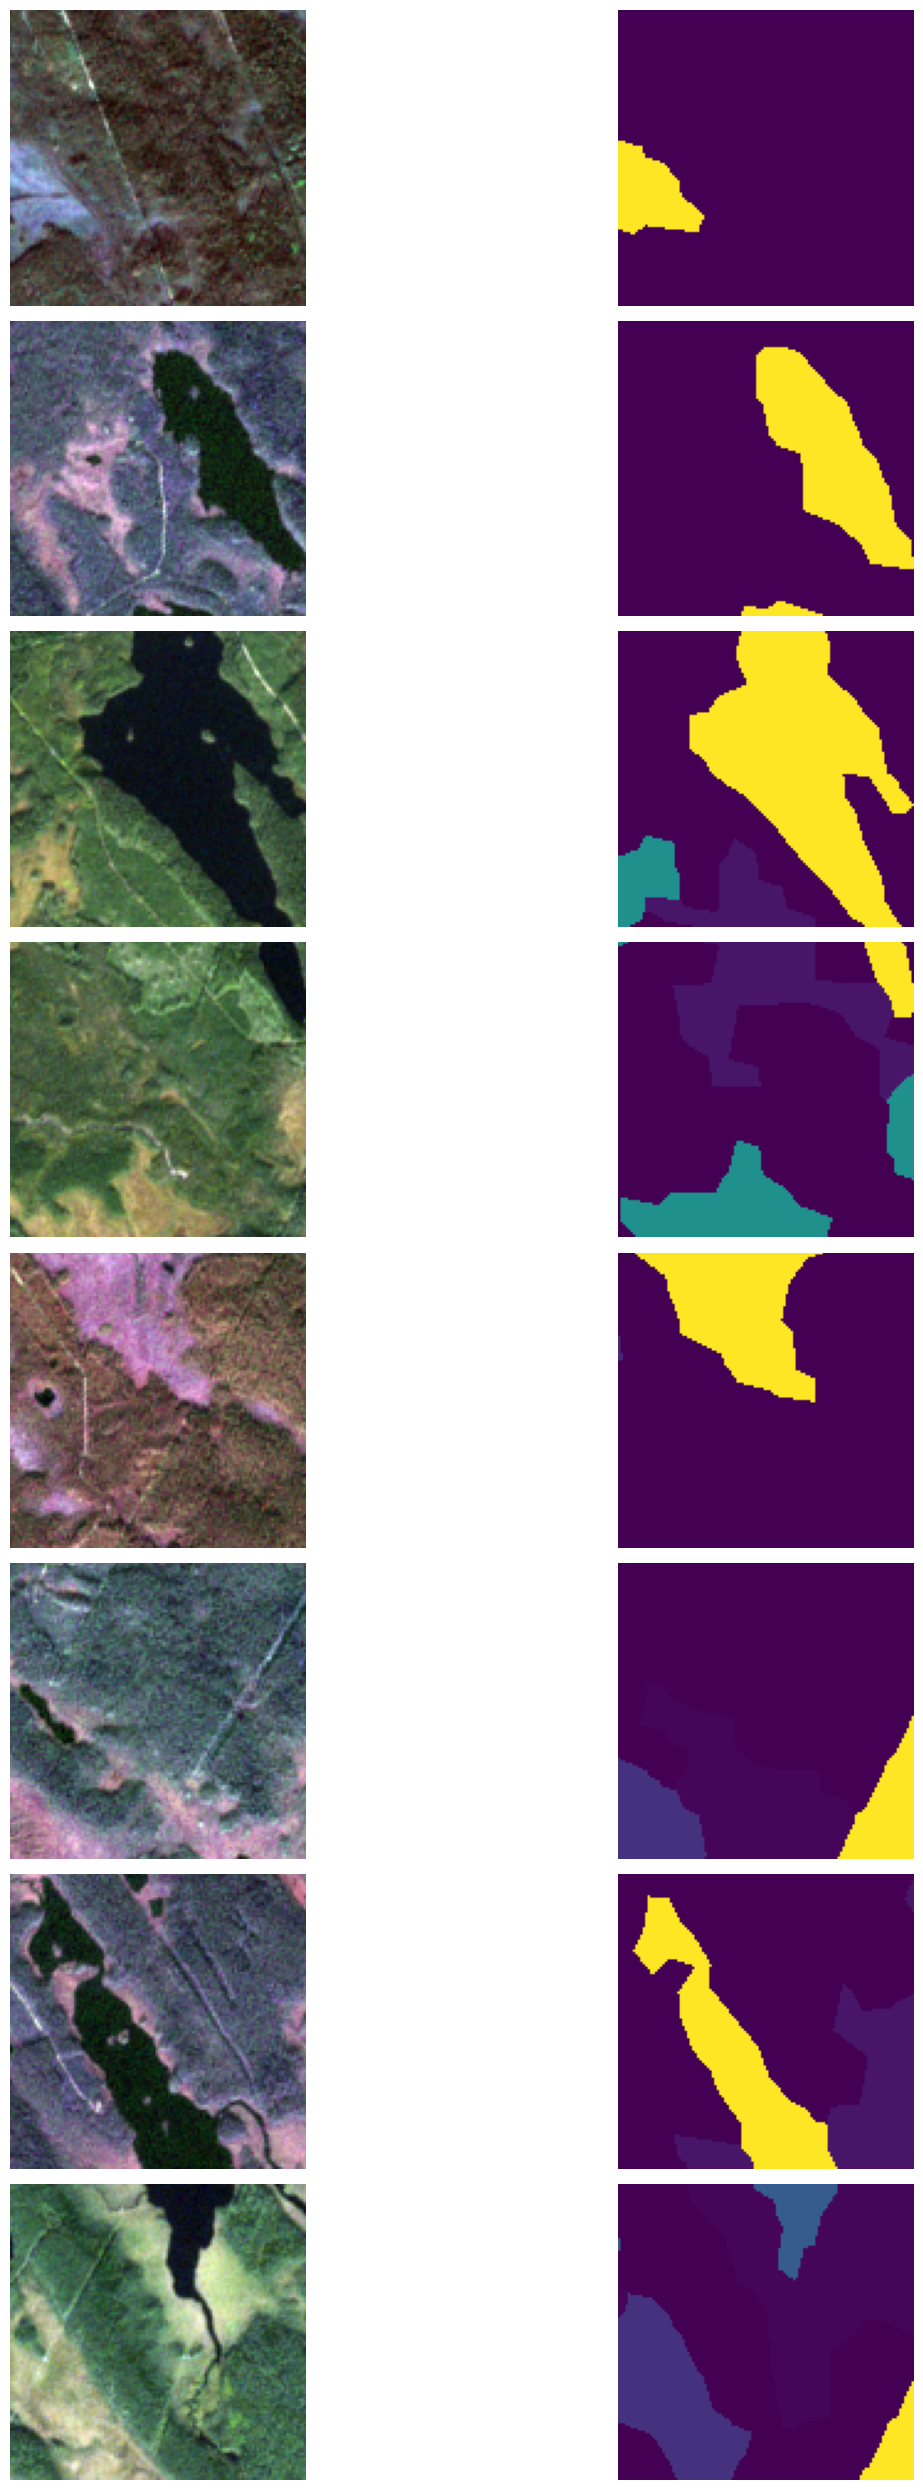

In [ ]:
plot_examples(sorted_images_list, sorted_masks_list, 4200, 4208)